In [22]:
import pandas as pd

df = pd.read_csv('output.csv')

In [ ]:
# ### FOR GOOGLE COLAB
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/MyDrive/BT4012 Project/output.csv')

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.head()

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,...,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,...,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,...,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,...,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,...,4,1794,15400,30,18,91.0,0,1,0.21,0


In [ ]:
df.shape

(3585, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

In [ ]:
#Check for NA values
df.isnull().sum()

host_response_rate           0
host_identity_verified       0
host_total_listings_count    0
city                         0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
fraud                        0
dtype: int64

# Exploratory Data Analysis (EDA)

Balance Labels by sampling smote

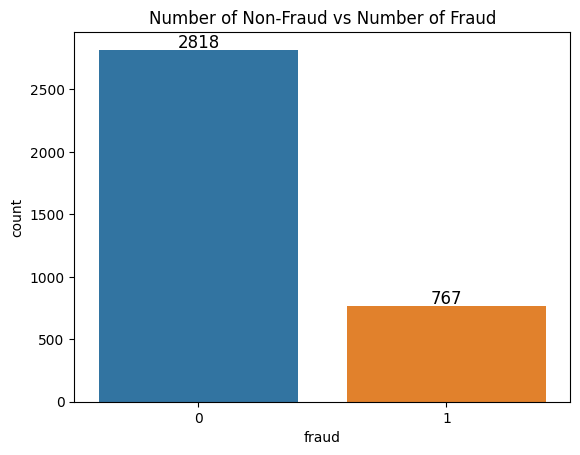

In [ ]:
ax = sns.countplot(x='fraud', data=df)

# Add the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Number of Non-Fraud vs Number of Fraud")

# Show the plot
plt.show()

In [ ]:
print("Unique values in feature:")
for i in df.columns:
  dis = len(df[i].unique())
  print(f"{i} - {dis}")

Unique values in feature:
host_response_rate - 52
host_identity_verified - 2
host_total_listings_count - 35
city - 38
is_location_exact - 2
property_type - 13
room_type - 3
accommodates - 14
bathrooms - 12
bedrooms - 6
beds - 11
bed_type - 5
amenities - 3092
price - 324
minimum_nights - 29
number_of_reviews - 178
review_scores_rating - 48
instant_bookable - 2
cancellation_policy - 4
reviews_per_month - 644
fraud - 2


Text(0.5, 1.0, 'Cities Distribution')

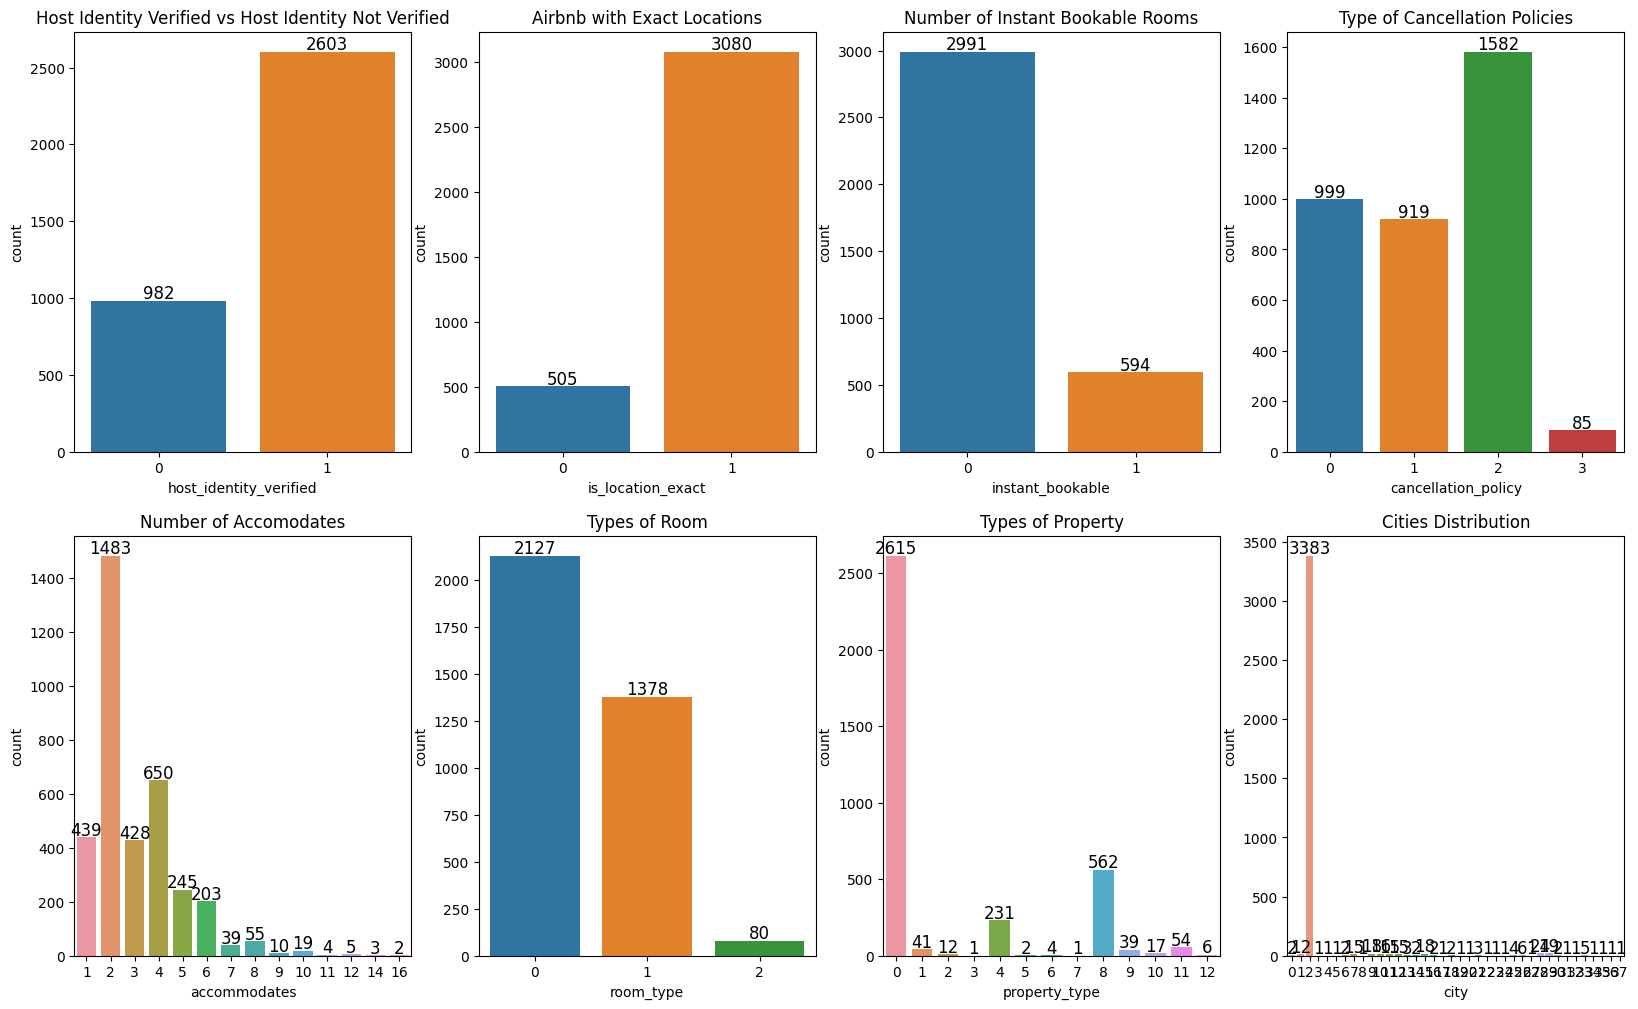

In [ ]:
#Visual Distribution of meaningful categorical features
plt.figure(figsize = [20,12])

#Host Identity Verification
plt.subplot(241)
ax = sns.countplot(x='host_identity_verified', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Host Identity Verified vs Host Identity Not Verified")

#Room Type
plt.subplot(242)
ax = sns.countplot(x='is_location_exact', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Airbnb with Exact Locations")

#Instant Bookable
plt.subplot(243)
ax = sns.countplot(x='instant_bookable', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of Instant Bookable Rooms")

#Cancellation Policies
plt.subplot(244)
ax = sns.countplot(x='cancellation_policy', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Type of Cancellation Policies")

#accommodates
plt.subplot(245)
ax = sns.countplot(x='accommodates', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Number of Accomodates")

#room_type
plt.subplot(246)
ax = sns.countplot(x='room_type', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Types of Room")

#property_type
plt.subplot(247)
ax = sns.countplot(x='property_type', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Types of Property")

#city
plt.subplot(248)
ax = sns.countplot(x='city', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.title("Cities Distribution")

<Axes: title={'center': 'City vs Fraud'}, xlabel='city', ylabel='Density'>

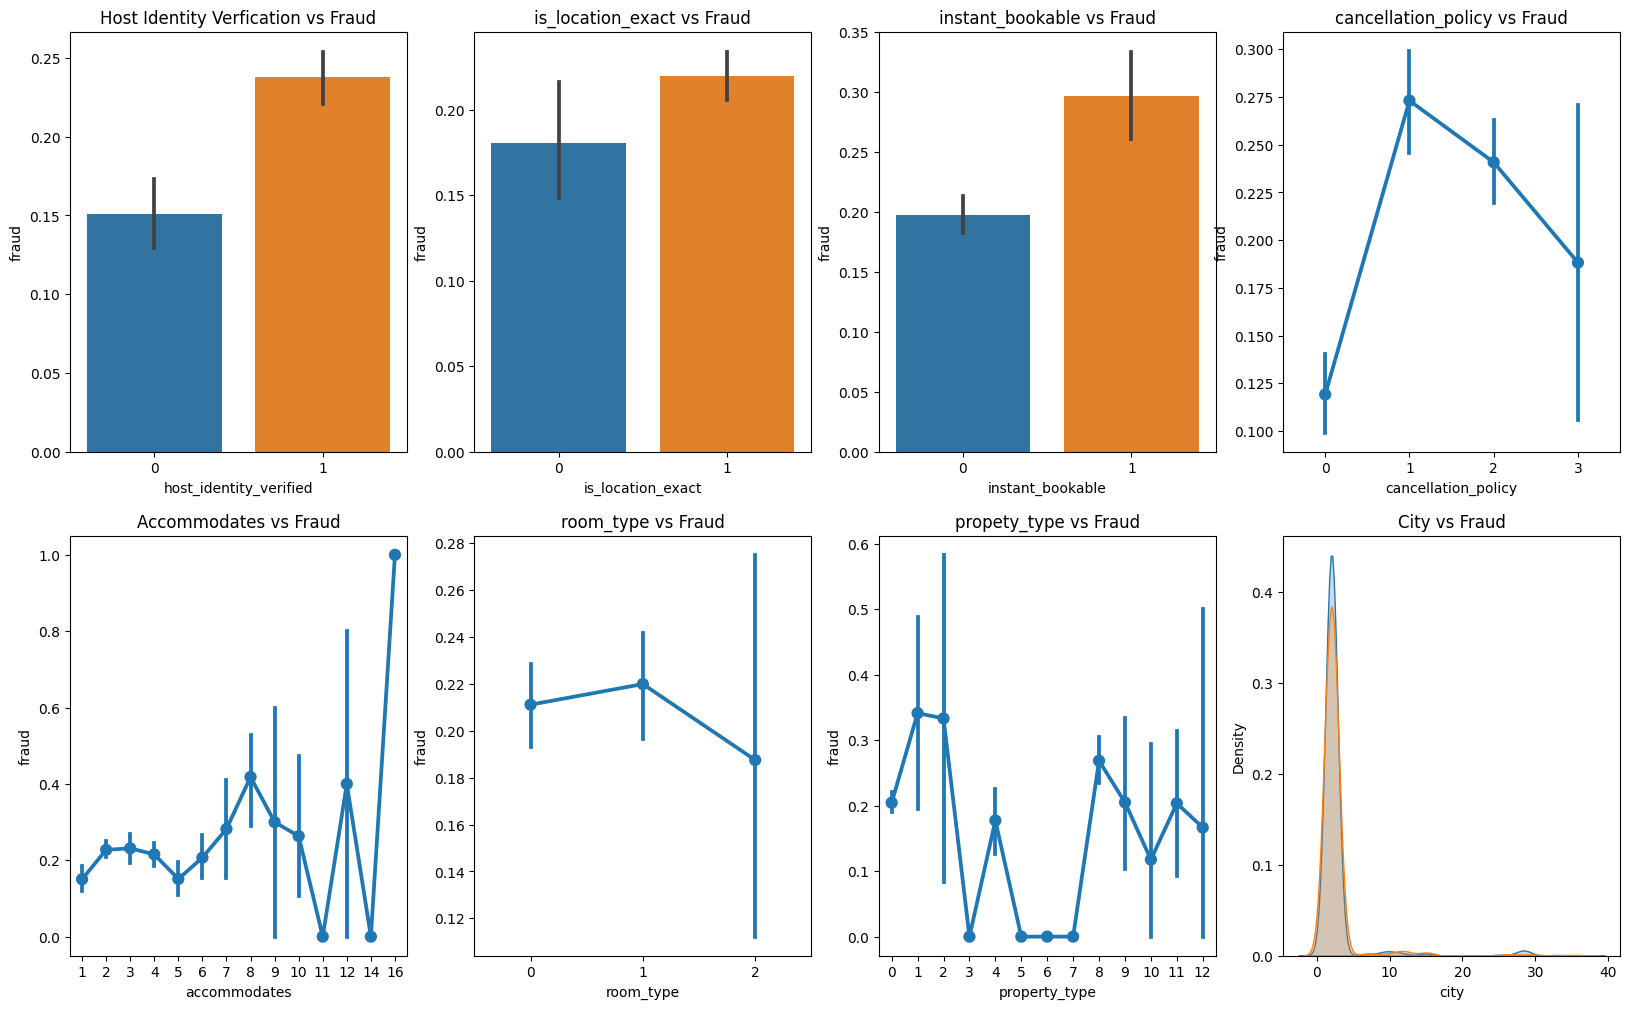

In [ ]:
fig, saxis = plt.subplots(2,4, figsize = (20, 12))
sns.barplot(x = "host_identity_verified", y ="fraud", data=df, ax = saxis[0,0]).set(title = "Host Identity Verfication vs Fraud")

sns.barplot(x = "is_location_exact", y ="fraud", data=df, ax = saxis[0,1]).set(title = "is_location_exact vs Fraud")

sns.barplot(x = "instant_bookable", y ="fraud", data=df, ax = saxis[0,2]).set(title = "instant_bookable vs Fraud")

sns.pointplot(x = 'cancellation_policy', y = 'fraud',  data=df, ax = saxis[0,3]).set(title = "cancellation_policy vs Fraud")

sns.pointplot(x = 'accommodates', y = 'fraud',  data=df, ax = saxis[1,0]).set(title = "Accommodates vs Fraud")

sns.pointplot(x = 'room_type', y = 'fraud', data=df, ax = saxis[1,1]).set(title = "room_type vs Fraud")

sns.pointplot(x = 'property_type', y = 'fraud', data=df, ax = saxis[1,2]).set(title = "propety_type vs Fraud")

sns.kdeplot(df[df['fraud'] == 0]['city'], ax = saxis[1,3], label='No Fraud', shade=True).set(title = "City vs Fraud")
sns.kdeplot(df[df['fraud'] == 1]['city'], ax= saxis[1,3], label='Fraud', shade=True)

Text(0, 0.5, '# Airbnb Listings')

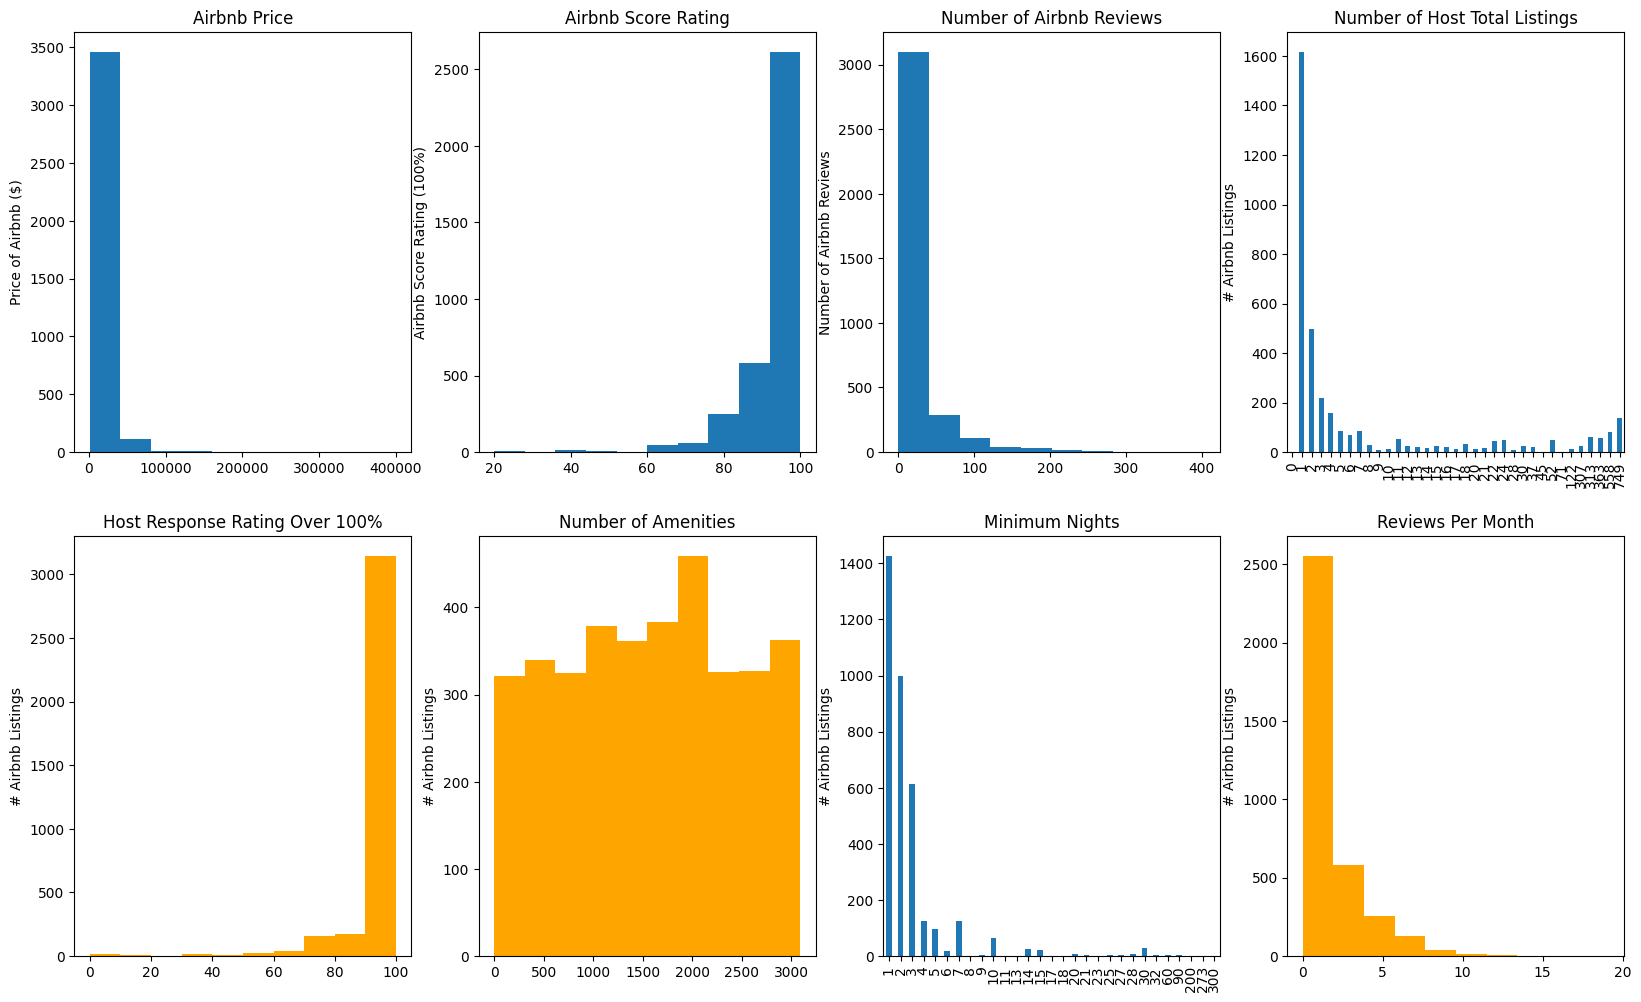

In [ ]:
#Visual Distribution of meaningful features
plt.figure(figsize = [20,12])

#Airbnb Price
plt.subplot(241)
# plt.boxplot(x=df['price'], showmeans = True, meanline = True)
plt.hist(x = df['price'])
plt.title('Airbnb Price')
plt.ylabel('Price of Airbnb ($)')

#Review Score Rating
plt.subplot(242)
plt.hist(x = df['review_scores_rating'])
plt.title('Airbnb Score Rating')
plt.ylabel('Airbnb Score Rating (100%)')

#Number of reviews
plt.subplot(243)
plt.hist(x = df['number_of_reviews'])
# plt.boxplot(x=df['number_of_reviews'], showmeans = True, meanline = True)
plt.title('Number of Airbnb Reviews')
plt.ylabel('Number of Airbnb Reviews')

#Total of host_total_listings_count
plt.subplot(244)
df['host_total_listings_count'].value_counts().sort_index().plot(kind = "bar")
plt.title('Number of Host Total Listings')
plt.ylabel('# Airbnb Listings')

#Host Response Rate
plt.subplot(245)
plt.hist(x = df['host_response_rate'], color = "orange")
plt.title('Host Response Rating Over 100%')
plt.ylabel('# Airbnb Listings')

#Amenities
plt.subplot(246)
plt.hist(x = df['amenities'], color = "orange")
plt.title('Number of Amenities')
plt.ylabel('# Airbnb Listings')

#Minimum Nights
plt.subplot(247)
df['minimum_nights'].value_counts().sort_index().plot(kind = "bar")
# plt.boxplot(x = df['minimum_nights'])
plt.title('Minimum Nights')
plt.ylabel('# Airbnb Listings')

#Reviews Per Month
plt.subplot(248)
plt.hist(x = df['reviews_per_month'], color = "orange")
plt.title('Reviews Per Month')
plt.ylabel('# Airbnb Listings')

Text(0.5, 0, 'Fraud')

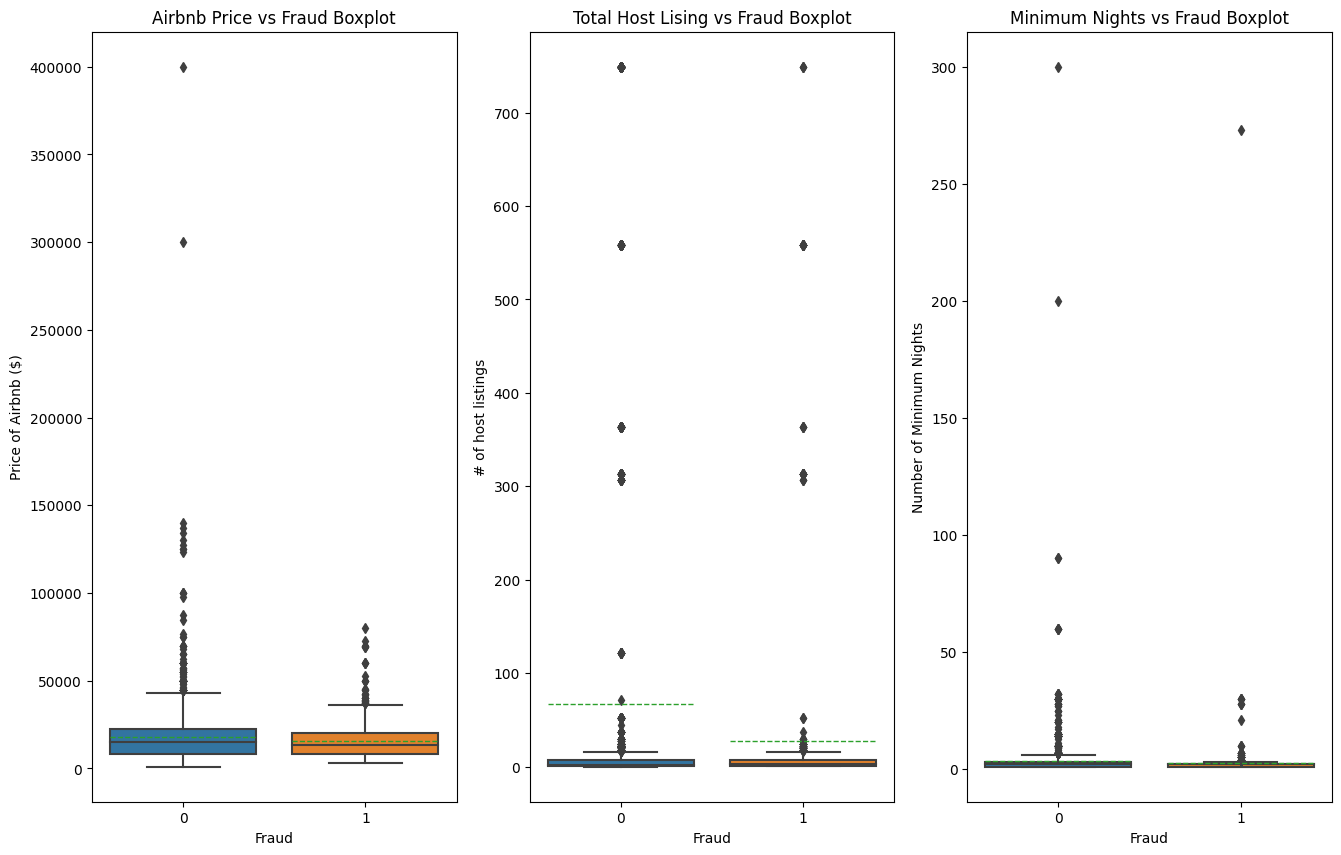

In [ ]:
#Continuous Features vs Fraud
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(16,10))

plt.subplot(131)
sns.boxplot(x = 'fraud', y = 'price', data=df, showmeans=True, meanline=True)
plt.title('Airbnb Price vs Fraud Boxplot')
plt.ylabel('Price of Airbnb ($)')
plt.xlabel('Fraud')

plt.subplot(132)
sns.boxplot(x = 'fraud', y = 'host_total_listings_count', data=df, showmeans=True, meanline=True)
plt.title('Total Host Lising vs Fraud Boxplot')
plt.ylabel('# of host listings')
plt.xlabel('Fraud')

plt.subplot(133)
sns.boxplot(x = 'fraud', y = 'minimum_nights', data=df, showmeans=True, meanline=True)
plt.title('Minimum Nights vs Fraud Boxplot')
plt.ylabel('Number of Minimum Nights')
plt.xlabel('Fraud')

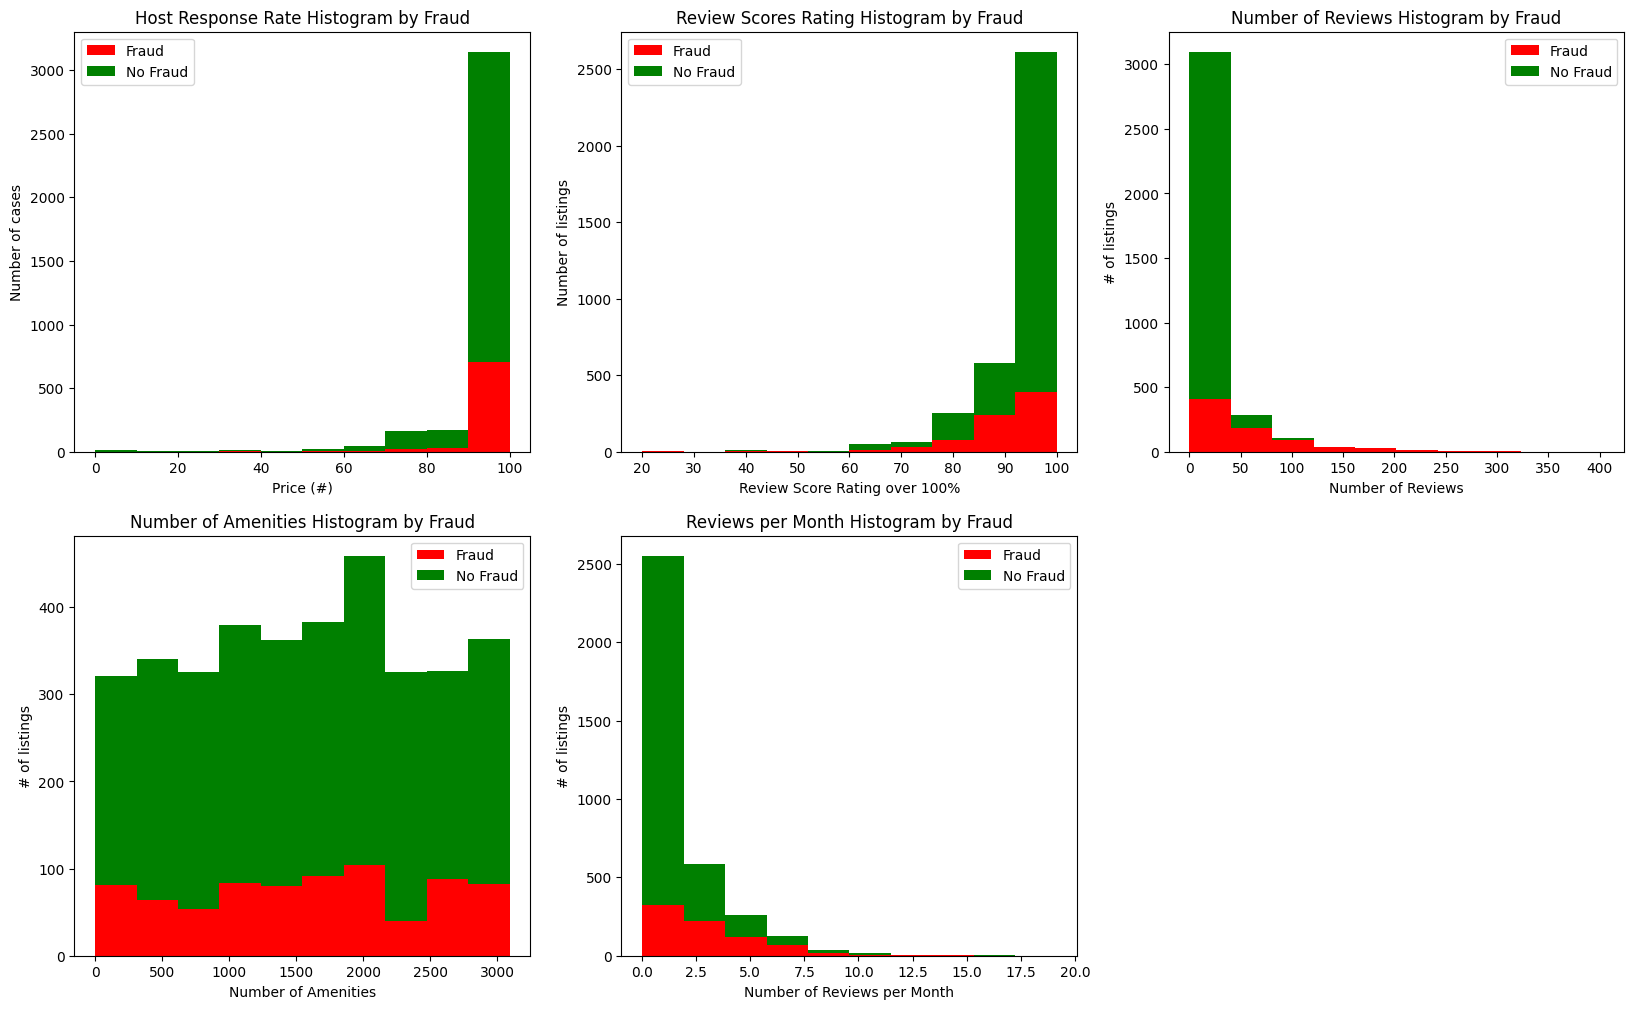

In [ ]:
plt.figure(figsize = [20,12])
#Host Response Rate Histogram By Fraud
plt.subplot(231)
plt.hist(x= [df[df["fraud"] == 1]["host_response_rate"], df[df["fraud"] == 0]["host_response_rate"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Host Response Rate Histogram by Fraud')
plt.xlabel('Price (#)')
plt.ylabel('Number of cases')
plt.legend()

#Score Rating Histogram By Fraud
plt.subplot(232)
plt.hist(x= [df[df["fraud"] == 1]["review_scores_rating"], df[df["fraud"] == 0]["review_scores_rating"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Review Scores Rating Histogram by Fraud')
plt.xlabel('Review Score Rating over 100%')
plt.ylabel('Number of listings')
plt.legend()

#Airbnb Reviews Per Month Histogram By Fraud
plt.subplot(233)
plt.hist(x= [df[df["fraud"] == 1]["number_of_reviews"], df[df["fraud"] == 0]["number_of_reviews"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Number of Reviews Histogram by Fraud')
plt.xlabel('Number of Reviews')
plt.ylabel('# of listings')
plt.legend()

#Number of Amenities Histogram By Fraud
plt.subplot(234)
plt.hist(x= [df[df["fraud"] == 1]["amenities"], df[df["fraud"] == 0]["amenities"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Number of Amenities Histogram by Fraud')
plt.xlabel('Number of Amenities')
plt.ylabel('# of listings')
plt.legend()

#Number of Reviews Per Month Histogram By Fraud
plt.subplot(235)
plt.hist(x= [df[df["fraud"] == 1]["reviews_per_month"], df[df["fraud"] == 0]["reviews_per_month"]], stacked=True, color = ['r', 'g'], label = ["Fraud", "No Fraud"])
plt.title('Reviews per Month Histogram by Fraud')
plt.xlabel('Number of Reviews per Month')
plt.ylabel('# of listings')
plt.legend()

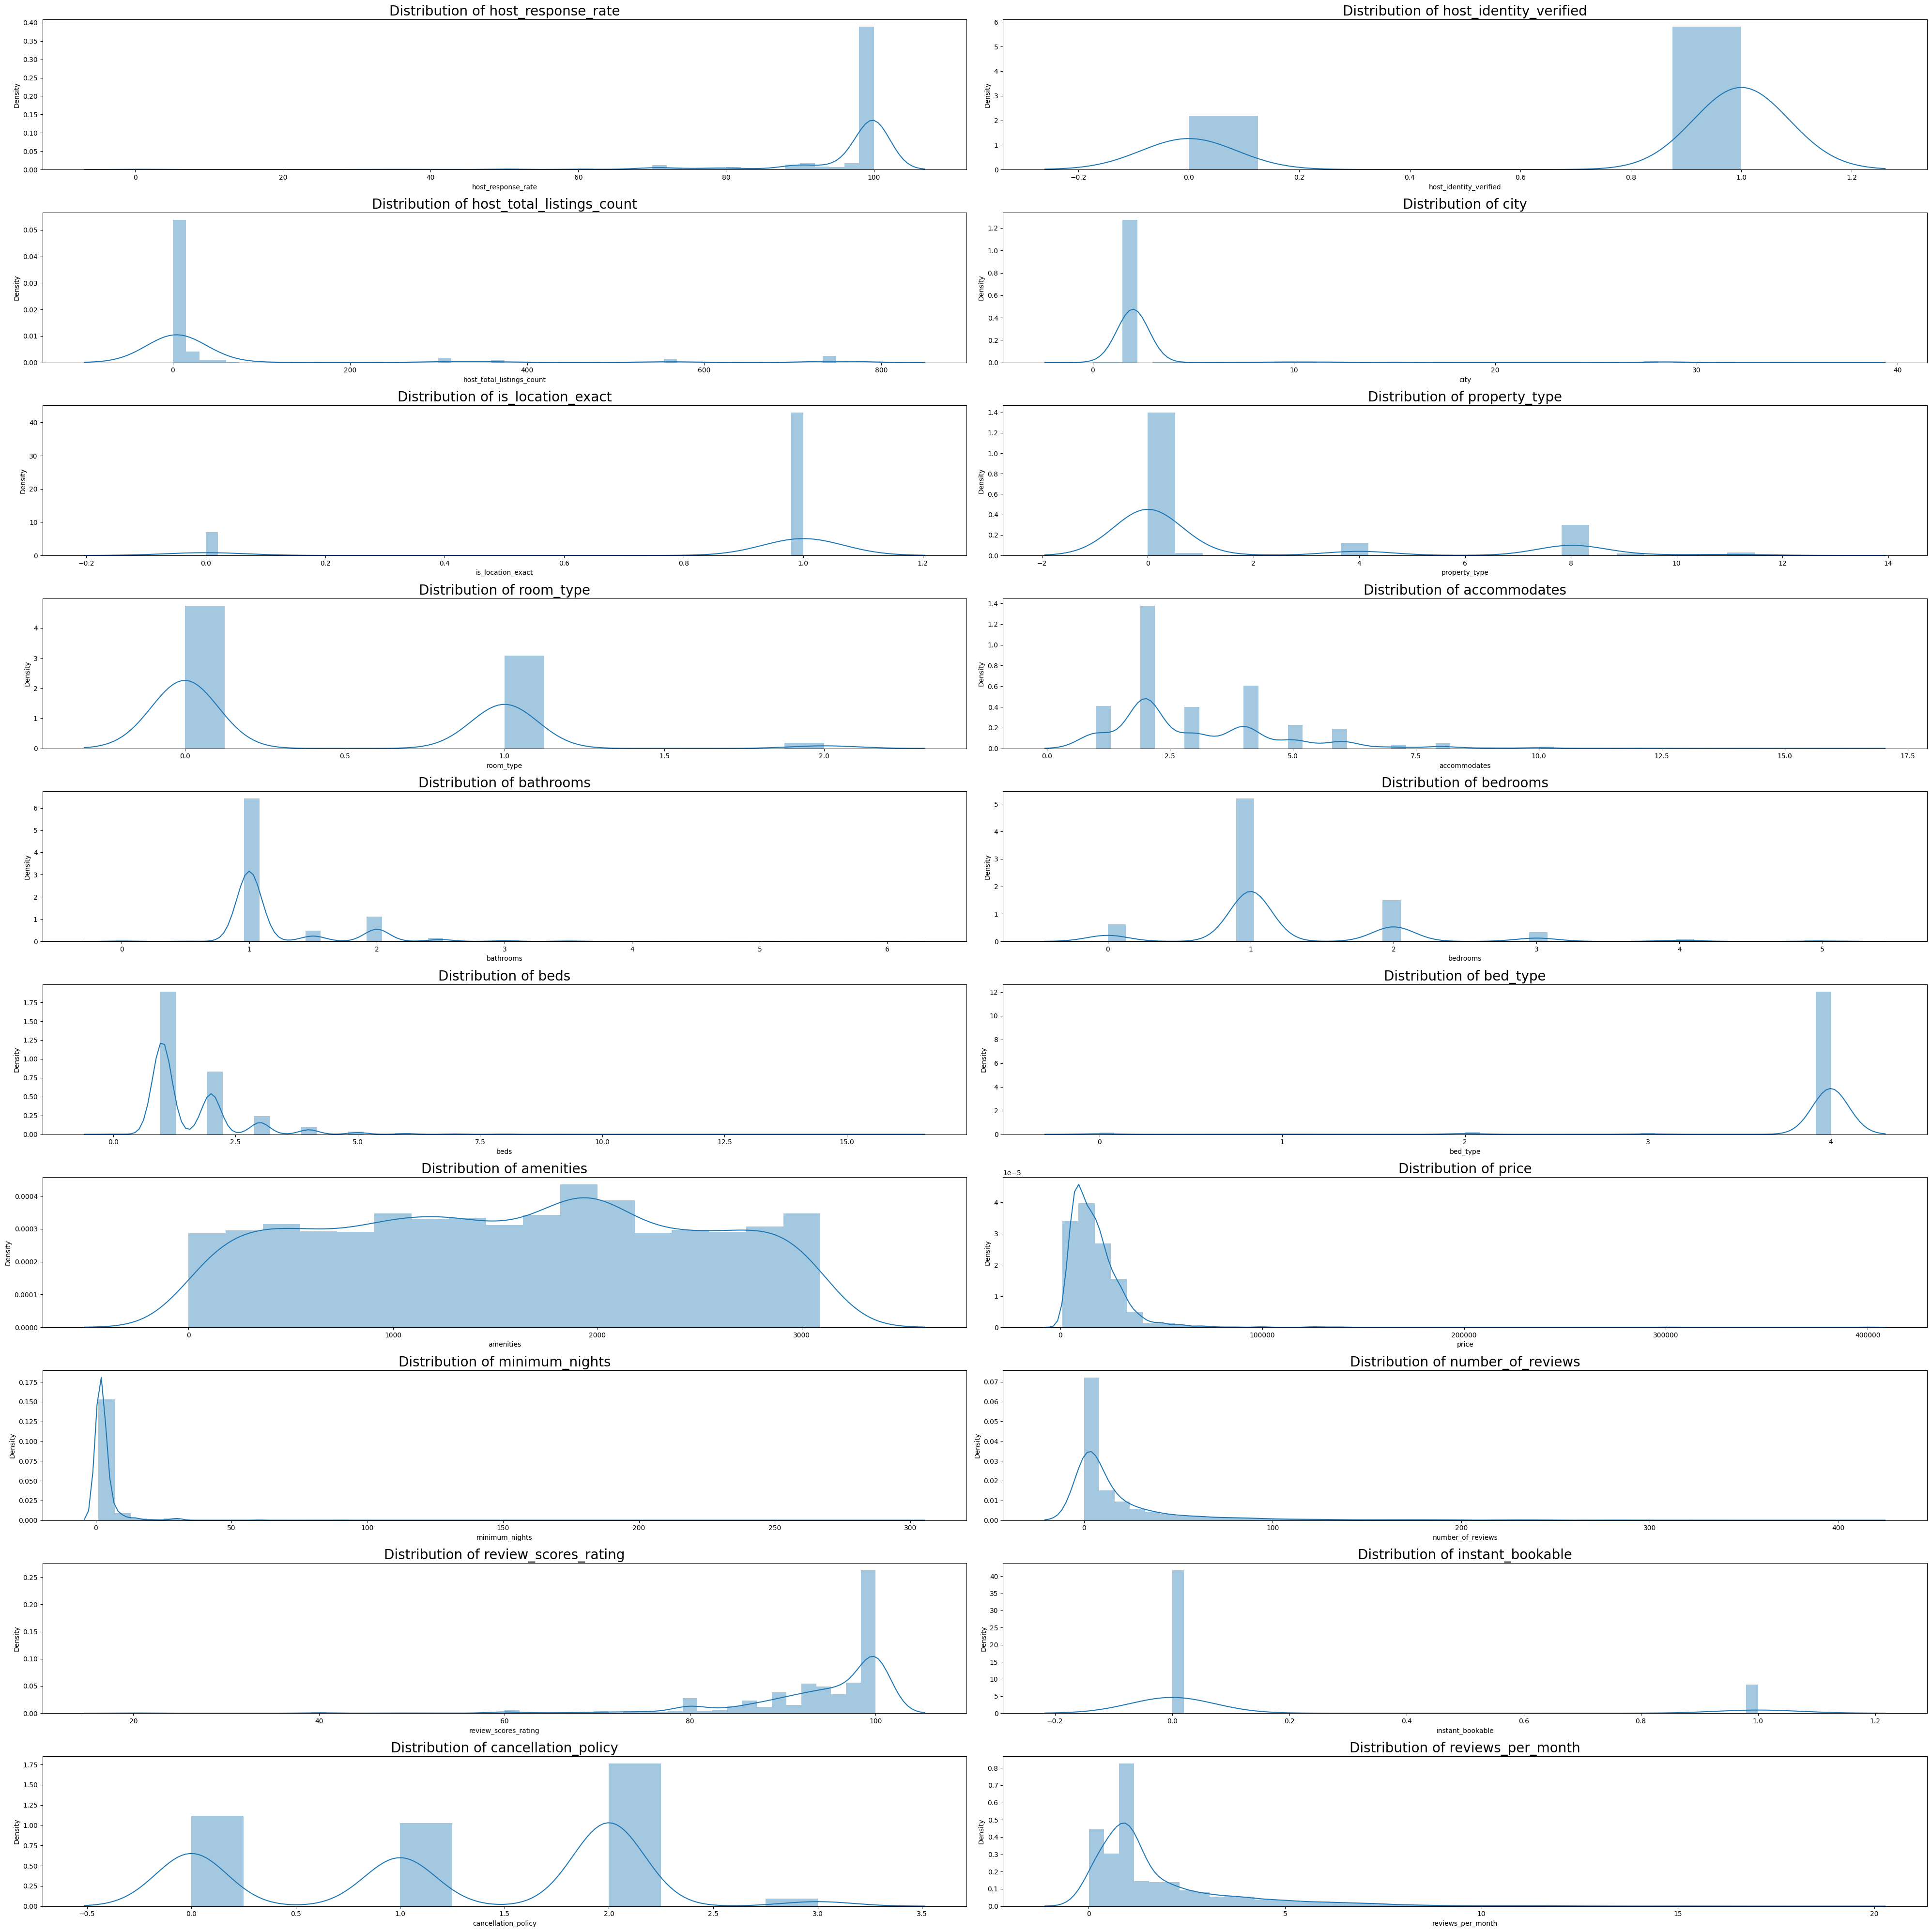

In [ ]:
# Visualise distribution of each feature
fig, axes = plt.subplots(nrows=10, ncols=2)
axes = axes.flatten()
fig.set_size_inches(40, 40)

for ax, col in zip(axes, df.columns):
    sns.distplot(df[col], ax=ax)
    ax.set_title("Distribution of "+col, fontsize=20)  # Adjust the fontsize as needed
plt.tight_layout()
plt.show()

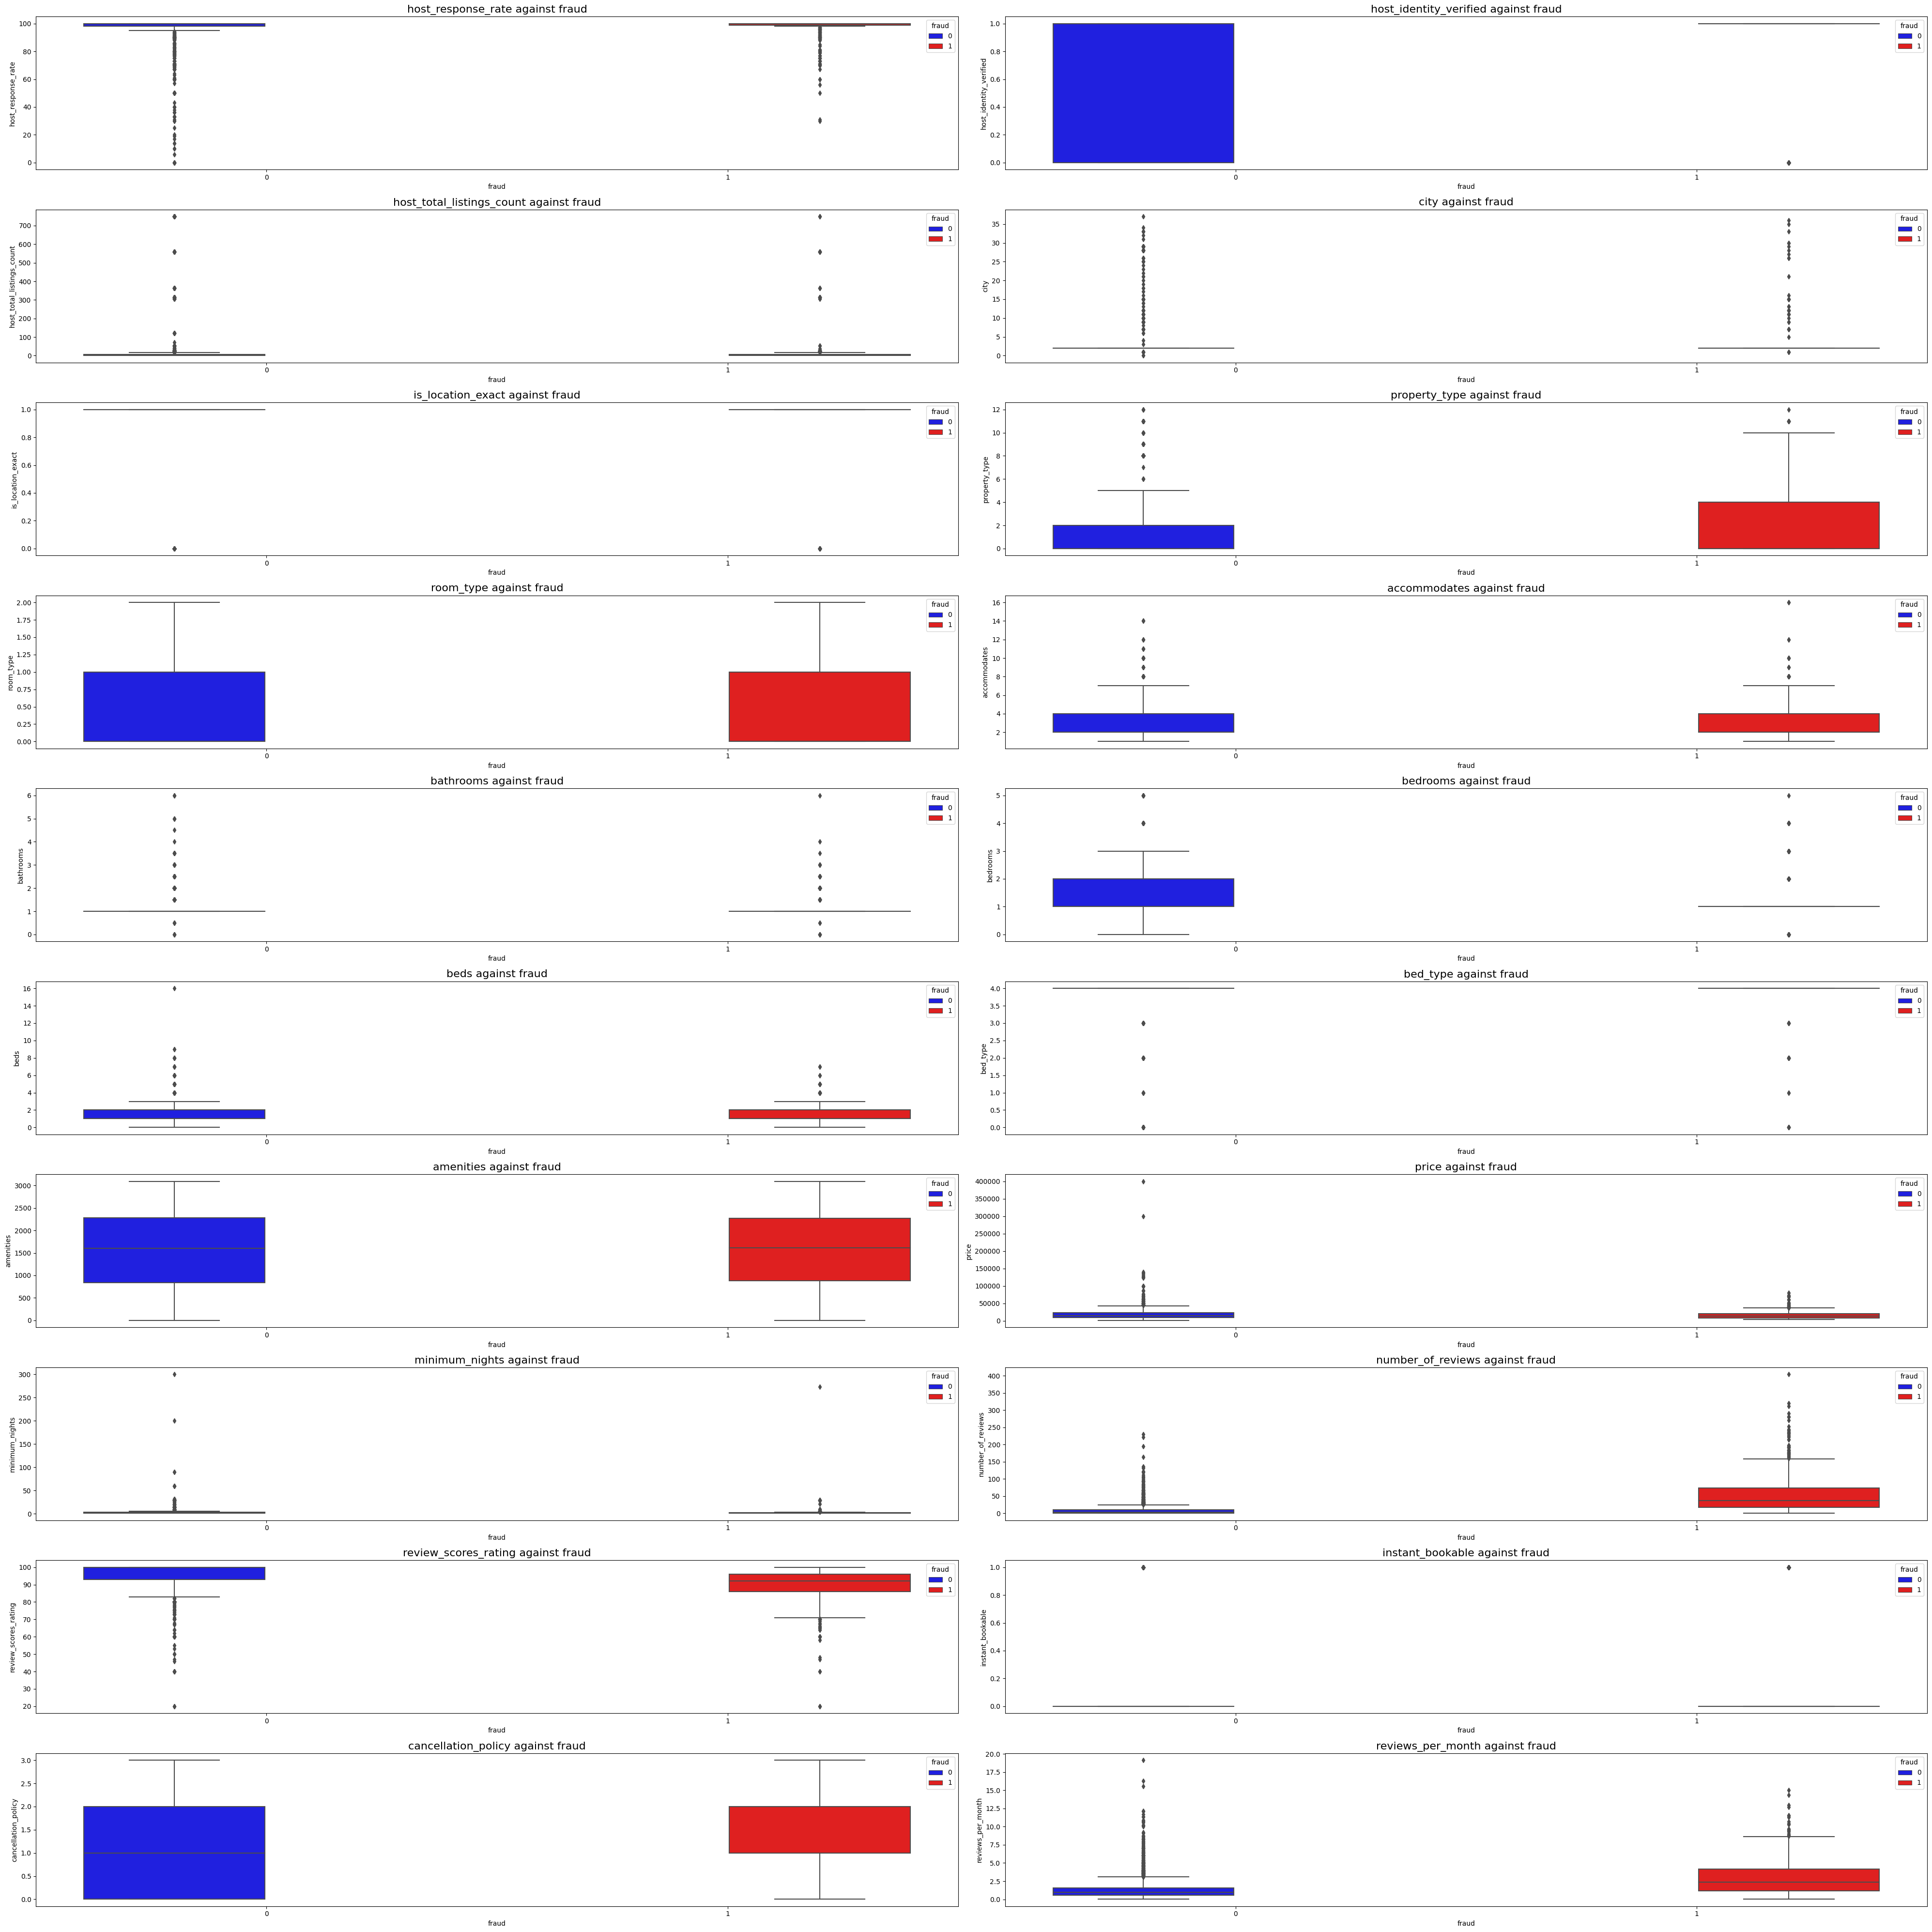

In [ ]:
# Visualise distribution of each feature against 'fraud'
fig, axes = plt.subplots(nrows=10, ncols=2)
axes = axes.flatten()
fig.set_size_inches(40, 40)

for ax, col in zip(axes, df.columns):
    sns.boxplot(x='fraud', y=df[col], ax=ax, hue='fraud', data=df, palette={0: 'blue', 1: 'red'})
    ax.set_title(col + " against fraud", fontsize=16)  # Adjust the fontsize as needed

plt.tight_layout()
plt.show()

Skewdness check for each feature value

In [ ]:
#Check for skewdness value for each value
from scipy.stats import skew

In [ ]:
for feat in df.columns:
    feat_skew = skew(df[feat], axis=0, bias=True)
    skewness = ""
    if feat_skew > 1 or feat_skew < -1:
      skewness = "Highly Skewed"
    elif feat_skew < 0.5 and feat_skew > -0.5:
      skewness = "Symmetric"
    else:
      skewness = "Moderate Skewed"

    print(f"{feat}'s skewness value is {feat_skew:.2f} and {skewness}")

host_response_rate's skewness value is -4.47 and Highly Skewed
host_identity_verified's skewness value is -1.01 and Highly Skewed
host_total_listings_count's skewness value is 3.17 and Highly Skewed
city's skewness value is 5.61 and Highly Skewed
is_location_exact's skewness value is -2.06 and Highly Skewed
property_type's skewness value is 1.40 and Highly Skewed
room_type's skewness value is 0.71 and Moderate Skewed
accommodates's skewness value is 1.68 and Highly Skewed
bathrooms's skewness value is 3.05 and Highly Skewed
bedrooms's skewness value is 1.49 and Highly Skewed
beds's skewness value is 3.05 and Highly Skewed
bed_type's skewness value is -6.30 and Highly Skewed
amenities's skewness value is -0.03 and Symmetric
price's skewness value is 8.52 and Highly Skewed
minimum_nights's skewness value is 22.54 and Highly Skewed
number_of_reviews's skewness value is 3.79 and Highly Skewed
review_scores_rating's skewness value is -2.88 and Highly Skewed
instant_bookable's skewness value

CLUSTERING

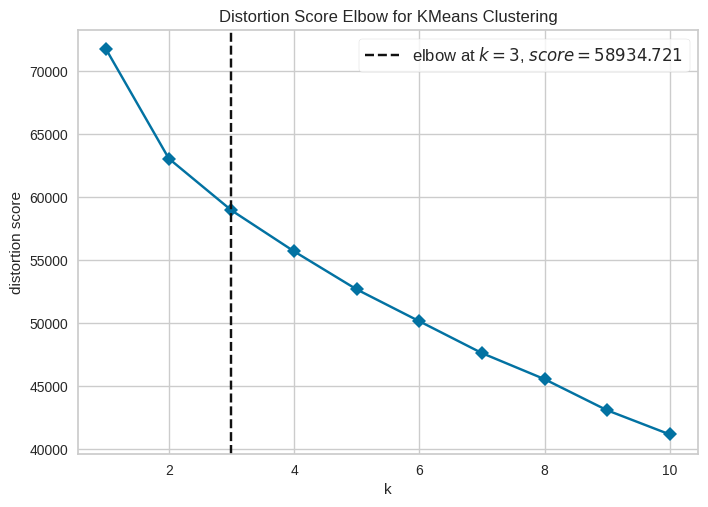

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

unsupervised_df = df.drop(['fraud'], axis=1)

# Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(unsupervised_df)

# Instantiate the KMeans model
model = KMeans()

# Use the KElbowVisualizer to find the optimal number of clusters
visualizer = KElbowVisualizer(model, k=(1, 11), timings=False)

visualizer.fit(features_standardized)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

In [28]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(unsupervised_df)
df

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud,cluster
0,90,1,6,1,1,0,1,1,1.0,1.0,...,547,4000,7,34,90.0,0,2,0.38,0,0
1,100,1,7,2,1,8,1,2,1.0,1.0,...,1158,14500,3,36,91.0,0,2,0.40,0,0
2,100,1,7,2,1,0,0,4,1.0,1.0,...,2016,19500,3,47,95.0,0,2,0.54,1,0
3,100,1,1,2,1,0,1,2,1.0,1.0,...,964,6500,3,41,98.0,0,1,0.47,0,0
4,100,0,12,2,1,0,0,3,1.0,1.0,...,1794,15400,30,18,91.0,0,1,0.21,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,100,0,1,2,1,8,1,1,1.0,1.0,...,265,19000,1,0,100.0,0,1,1.00,0,0
3581,100,0,1,12,0,8,1,1,1.0,1.0,...,2279,5500,1,0,100.0,0,0,1.00,0,0
3582,100,1,1,2,0,0,1,2,1.0,1.0,...,2569,9000,1,0,100.0,0,2,1.00,0,0
3583,100,1,2,2,0,0,2,1,1.0,1.0,...,800,4900,1,0,100.0,0,2,1.00,0,0


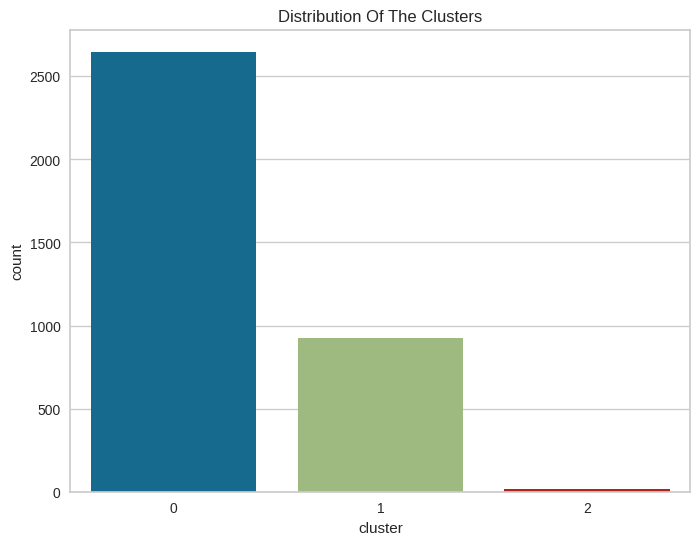

In [29]:
# Create a countplot of the cluster distribution
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x=df["cluster"])

# Set the title
countplot.set_title("Distribution Of The Clusters")

# Show the plot
plt.show()

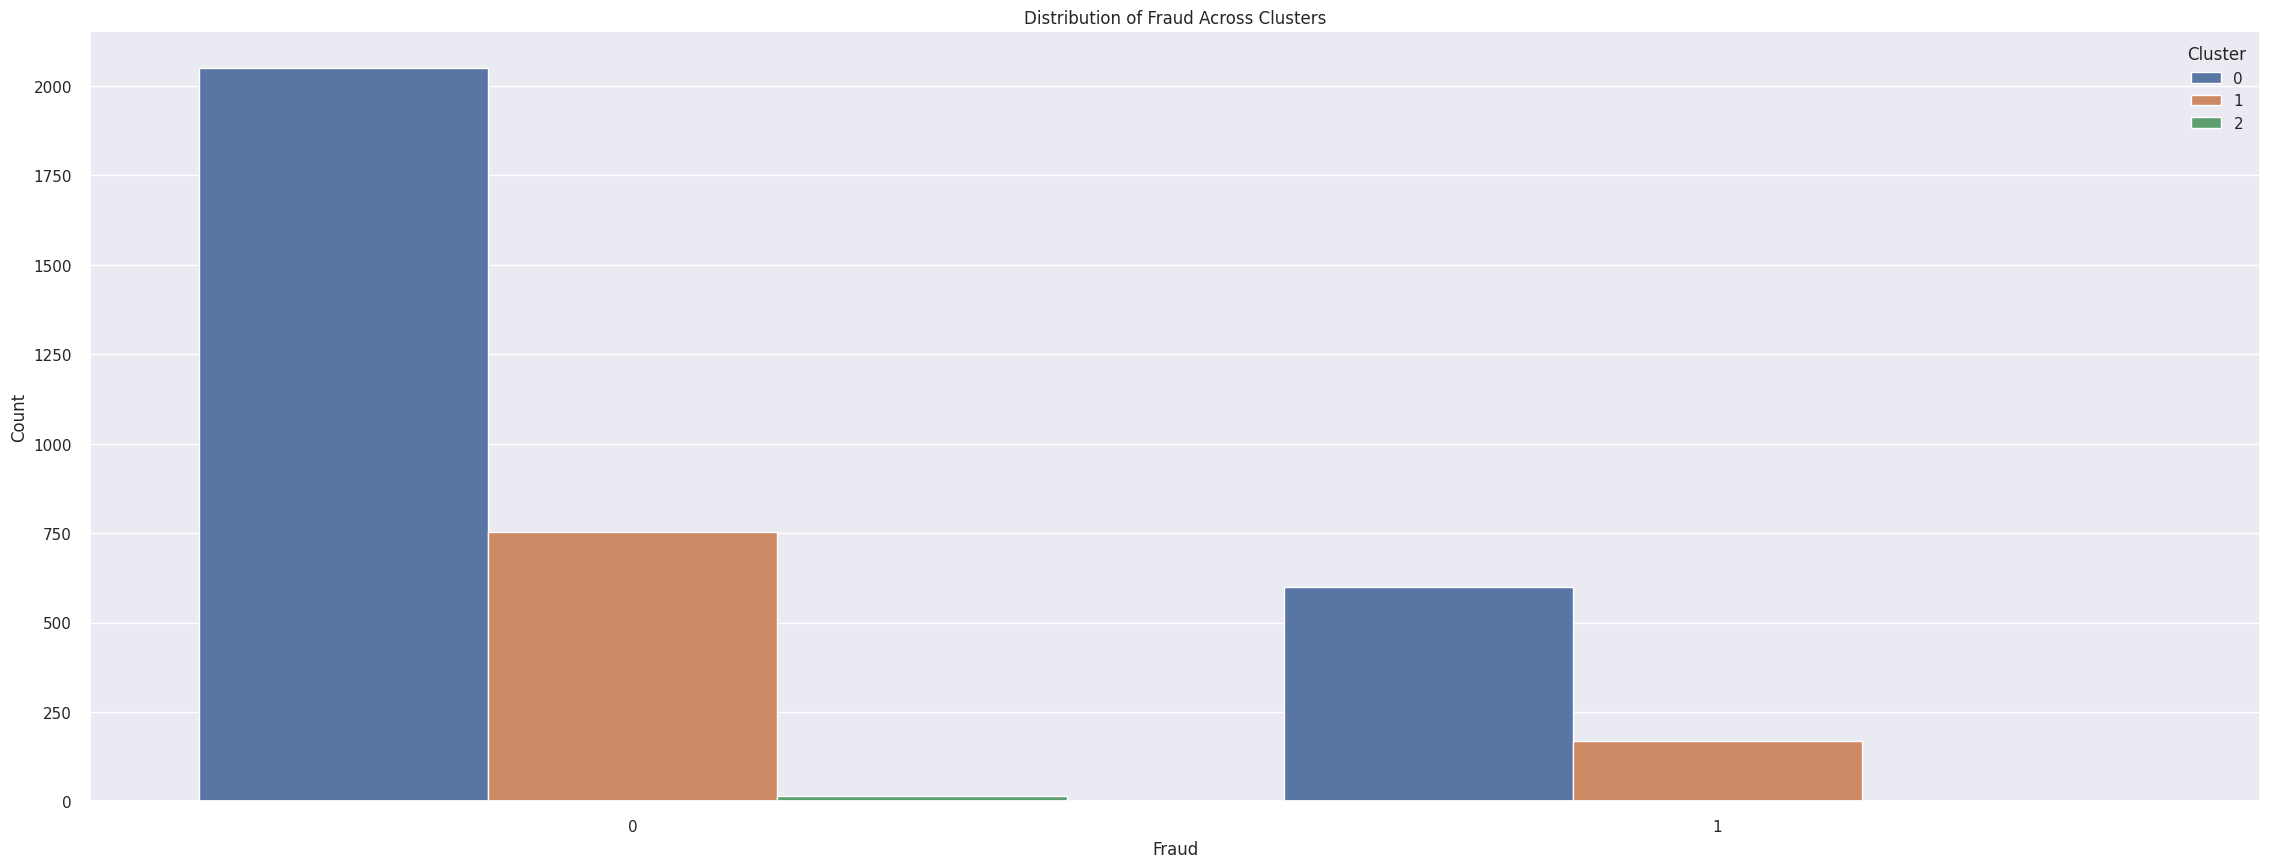

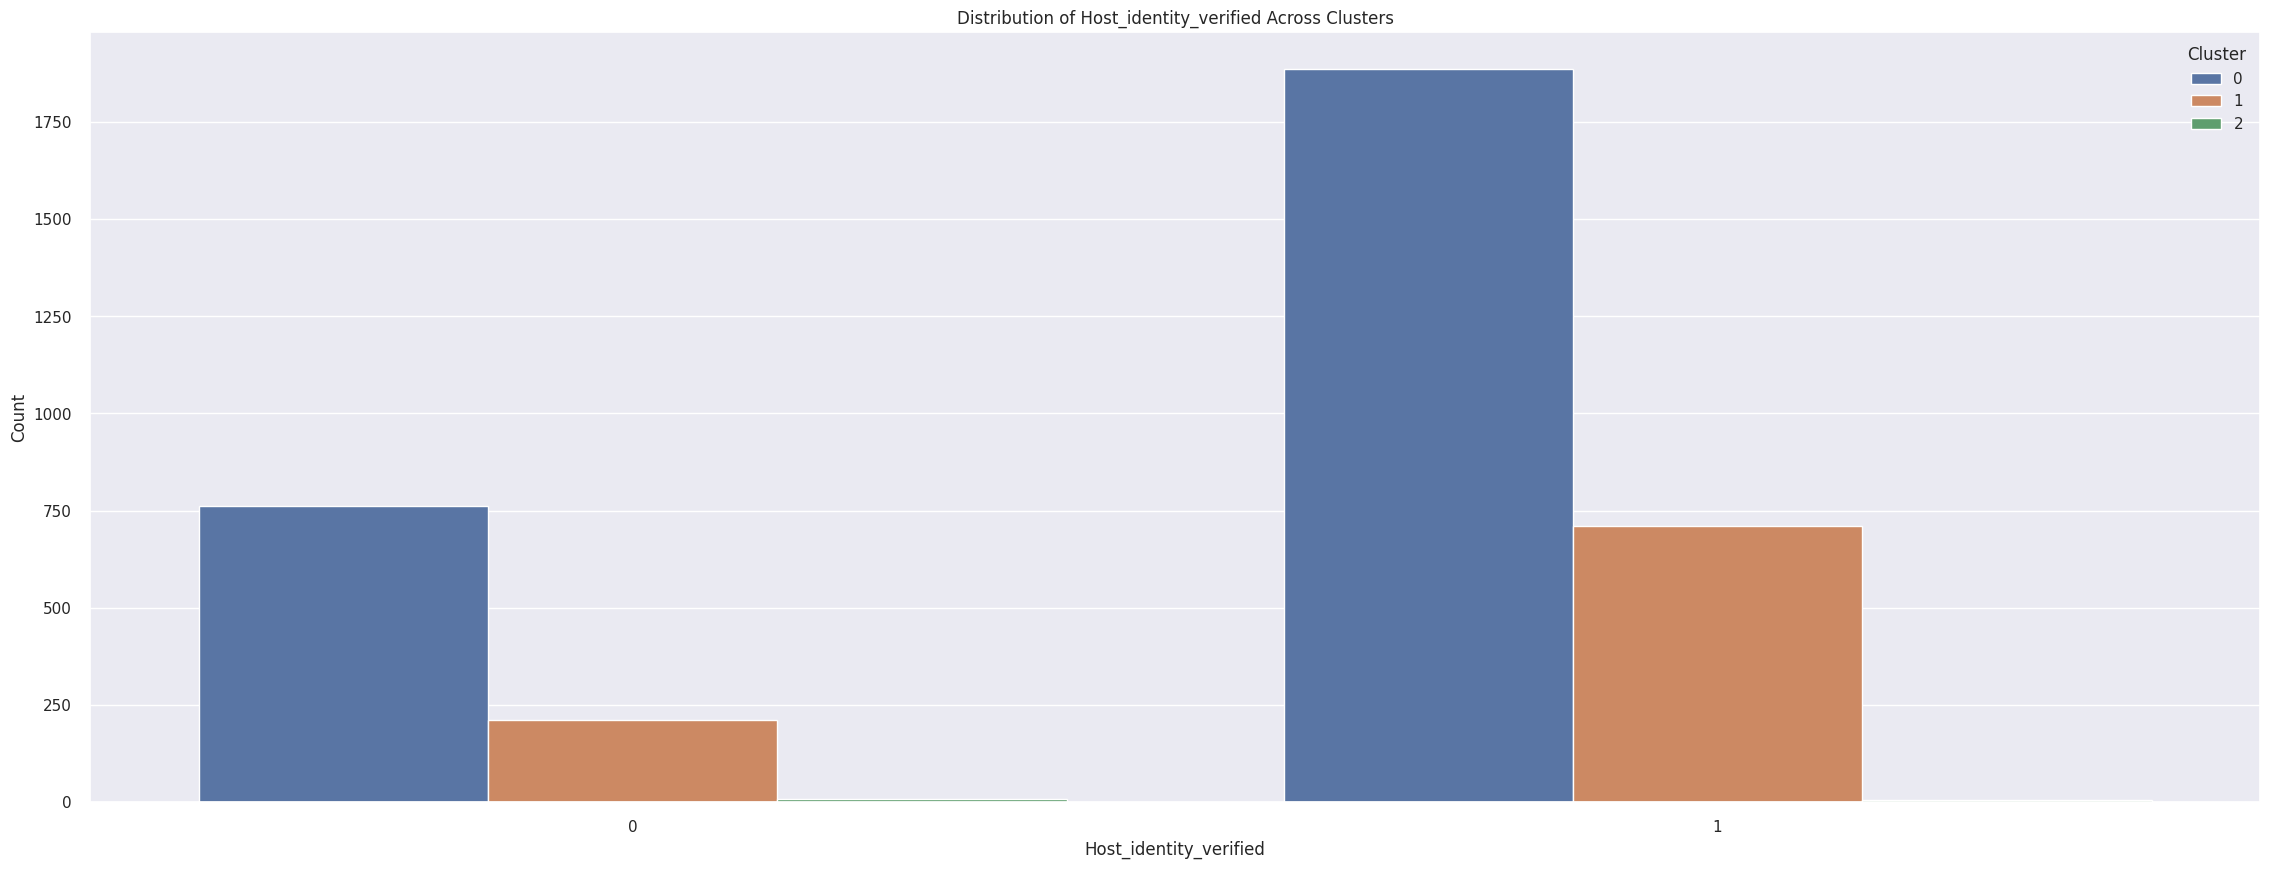

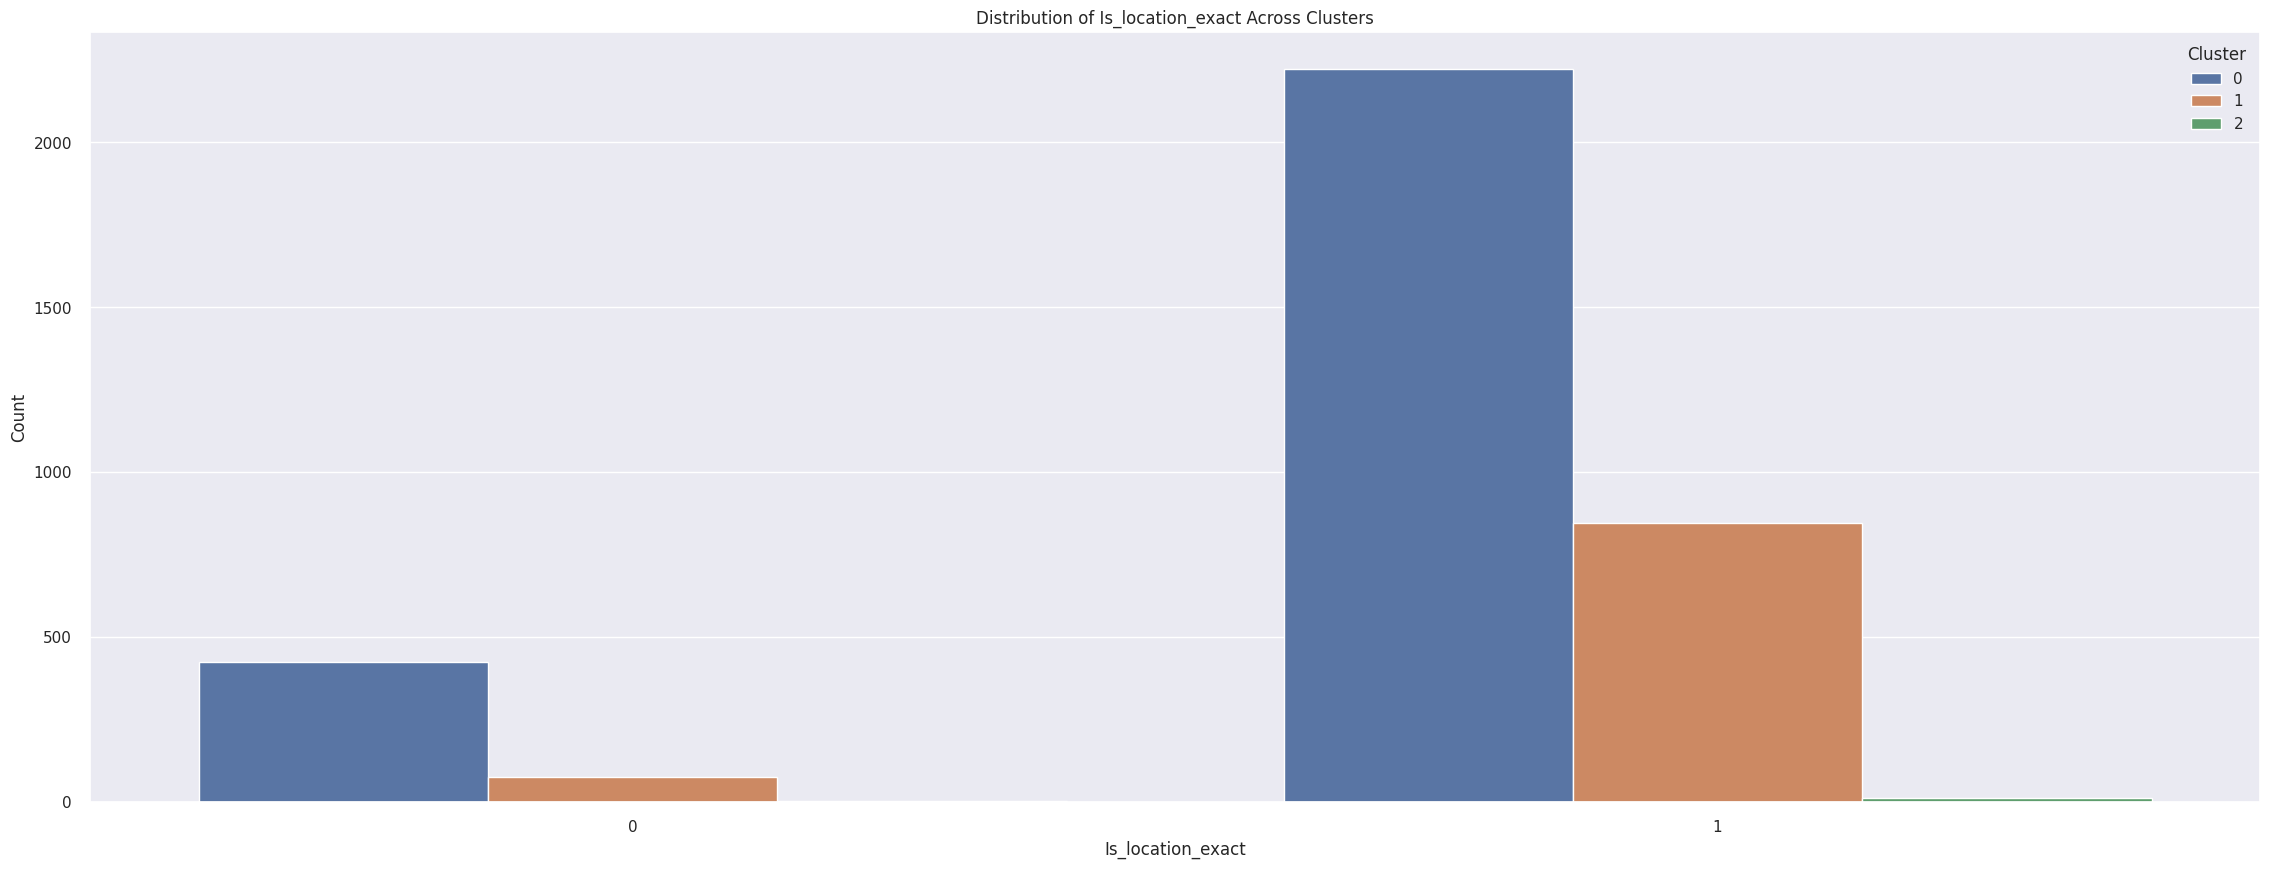

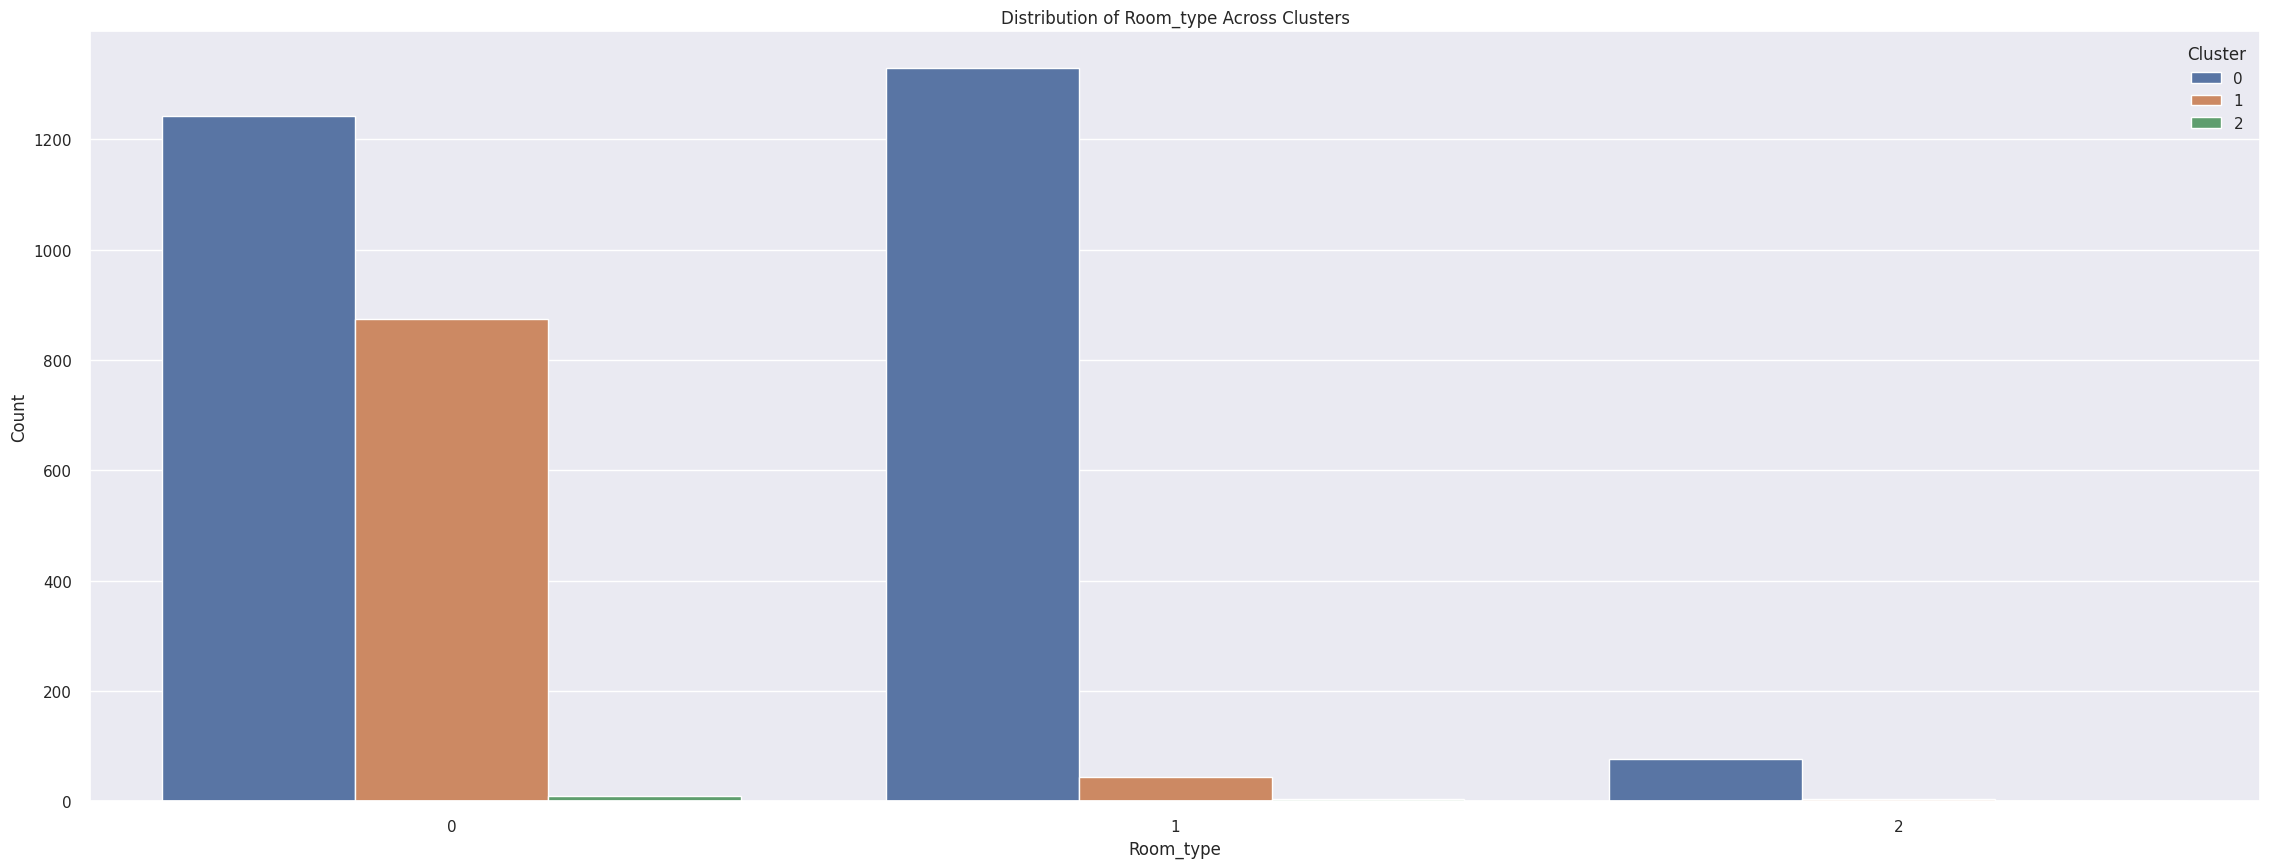

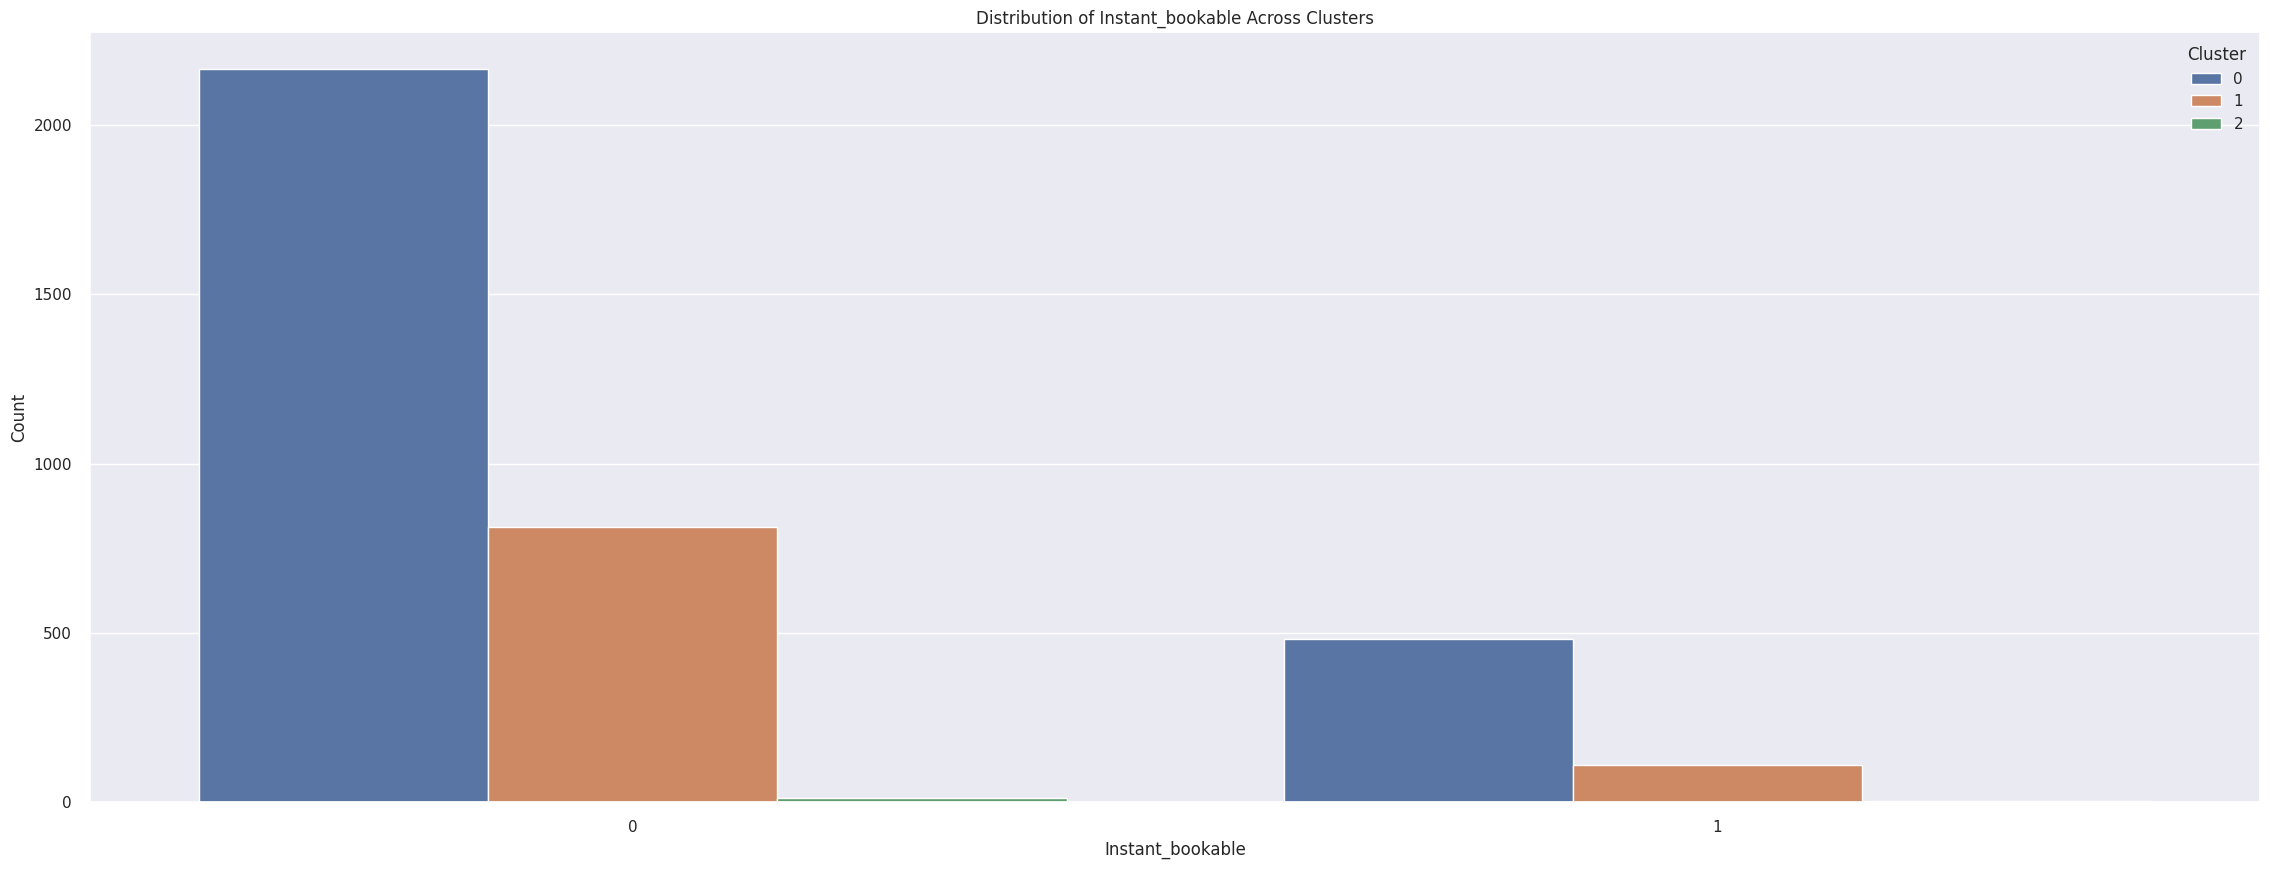

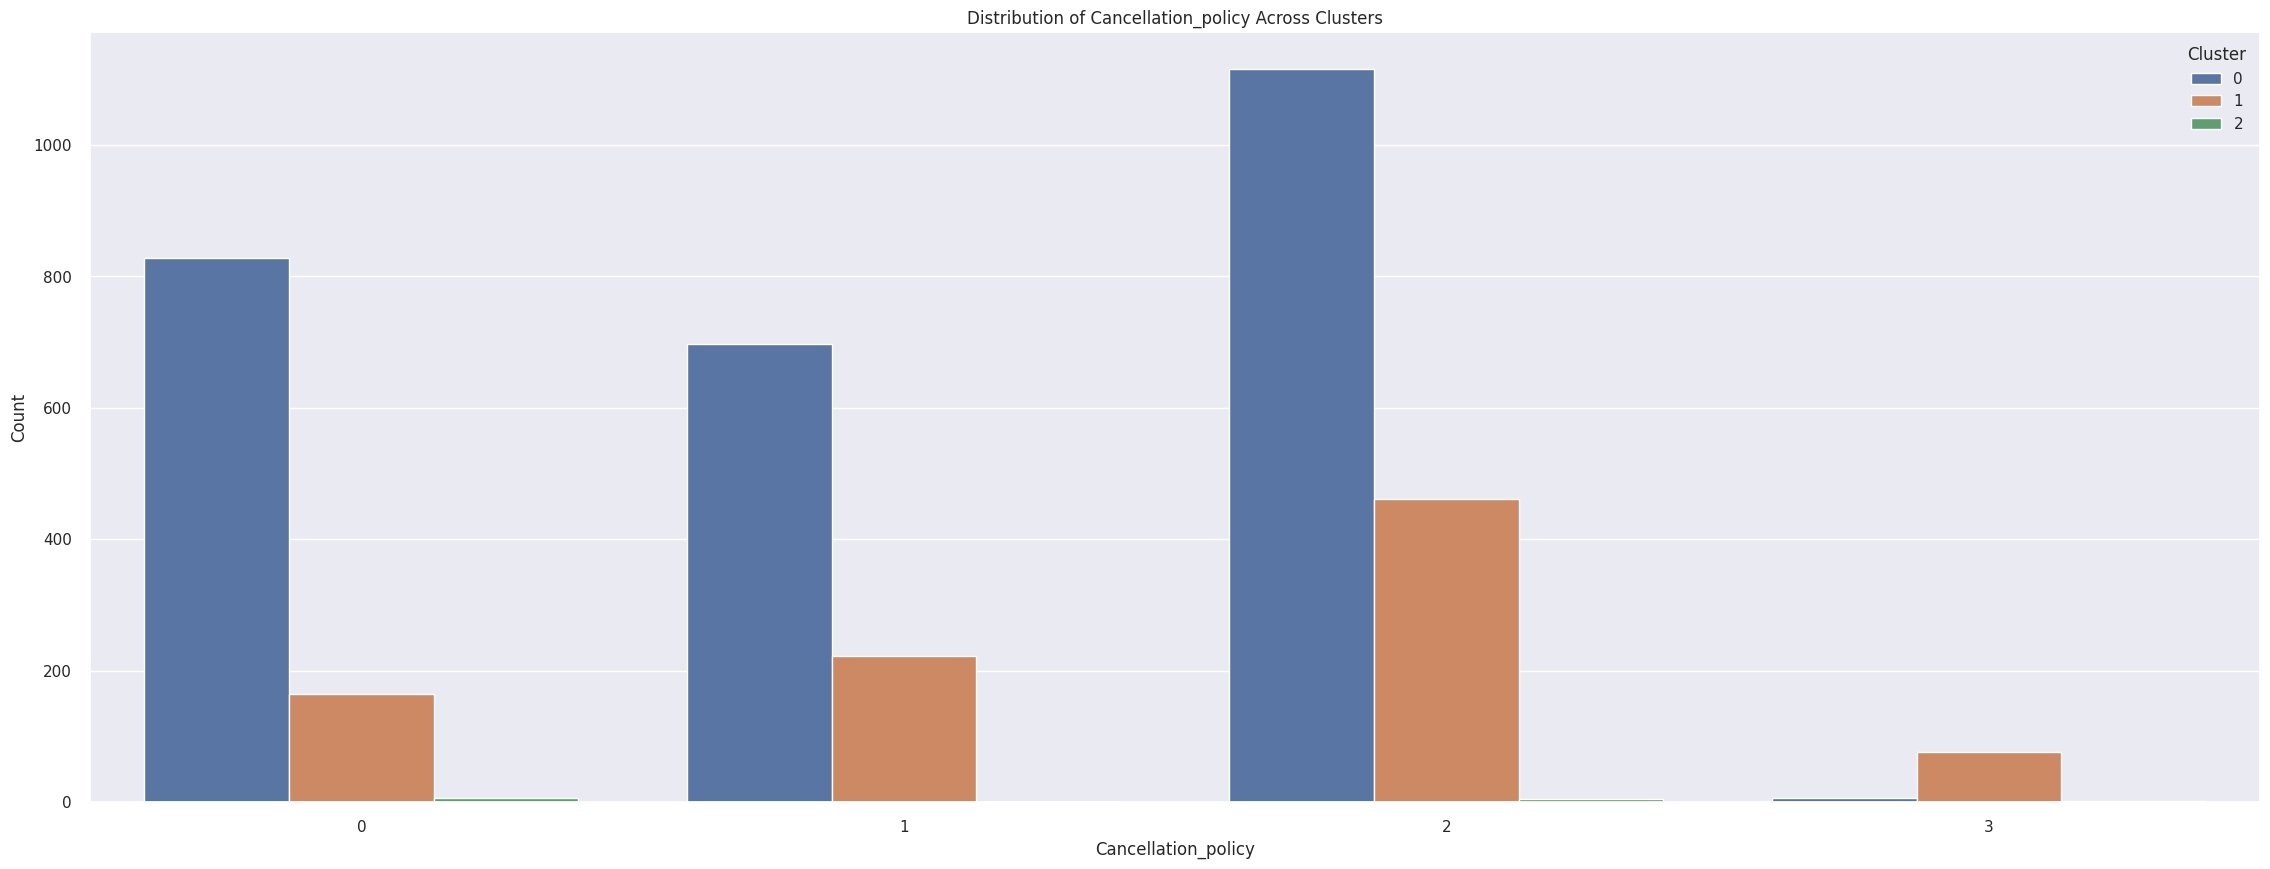

In [30]:
# check distribution

import seaborn as sns

# Define the features to profile
features_to_profile = ['fraud', 'host_identity_verified', 'is_location_exact', 'room_type', 'instant_bookable',
                       'cancellation_policy']

for feature in features_to_profile:
    plt.figure(figsize=(28, 10))
    sns.set(style="darkgrid")

    sns.countplot(data=df, x=feature, hue='cluster')

    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature.capitalize()} Across Clusters')
    plt.legend(title='Cluster', loc='upper right')
    plt.show()


In [32]:
x_km = df.groupby('cluster')[['host_response_rate', 'host_total_listings_count', 'amenities', 'minimum_nights',
                                            'number_of_reviews', 'review_scores_rating', 'price']].mean()
x_km_rounded = x_km.round()
x_km_rounded['cluster'] = [0, 1, 2]
x_km_rounded

,host_response_rate,host_total_listings_count,amenities,minimum_nights,number_of_reviews,review_scores_rating,price,cluster
cluster,,,,,,,,
0,96.0,35.0,1517.0,3.0,21.0,93.0,11755.0,0
1,96.0,130.0,1721.0,3.0,13.0,95.0,31511.0,1
2,93.0,2.0,1725.0,17.0,0.0,100.0,152864.0,2
